<a href="https://colab.research.google.com/github/KaramAlmaghout/SurgicalToolsDetection/blob/main/SurgicalToolsDetection_YOLOv8m_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Applied MAchine Learning - Course Project

## Surgical Tools Detection

### YOLOv8m

**Karam Almaghout:**

k.almaghout@innopolis.university

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Sat May 13 06:03:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
from google.colab import drive
drive.mount('/gdrive')
HOME = os.getcwd()
print(HOME)

Mounted at /gdrive
/content


## Install YOLOv8

In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [5]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

### Download Annotated Dataset from Roboflow in YOLOv8 format

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Xbp6CtDn4FZ1jGn5BIlr")
project = rf.workspace("amlcourse").project("surgical-tools-detection-tjnkm")
dataset = project.version(2).download("yolov8")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=d7ca9d0792b8122a174490731dd590dfa3dab5332c1cec0c812f5b44c0c2fd6e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstall

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Surgical-Tools-Detection-2 in yolov8:: 100%|██████████| 2106/2106 [00:01<00:00, 2044.26it/s]


## Training

In [8]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=300 imgsz=640

/content
100% 52.4M/52.4M [00:00<00:00, 376MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.yaml, data=/content/datasets/Surgical-Tools-Detection-2/data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=tor

In [9]:
!ls {HOME}/runs/segment/train/

args.yaml					    train_batch0.jpg
events.out.tfevents.1683957868.a5412902816d.1253.0  train_batch1.jpg
results.csv					    train_batch2.jpg
results.png					    weights


/content


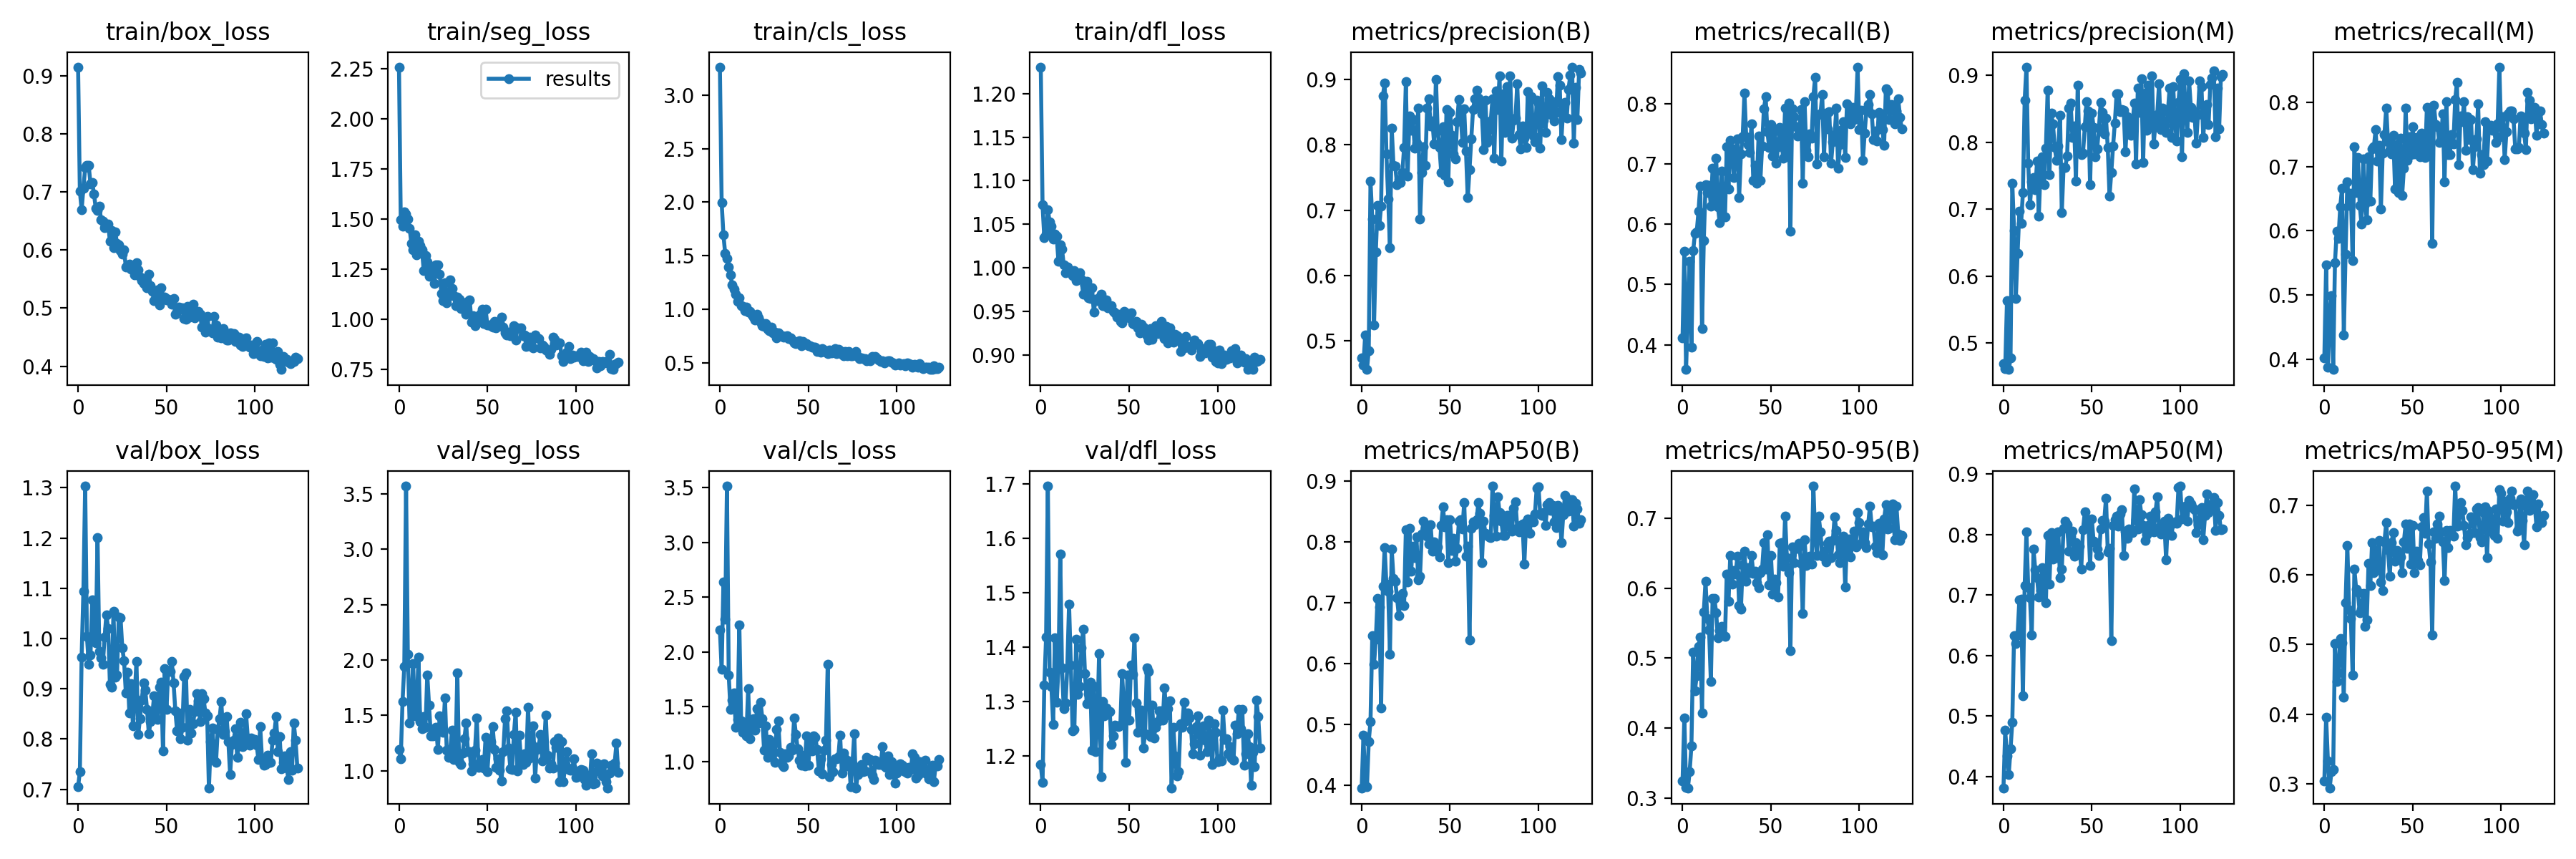

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

## Validate the Trained Model

In [14]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-13 08:08:54.410566: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-13 08:08:55.288176: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27226437 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/datasets/Surgical-Tools-Detection-2/valid/labels.cache... 84 images, 1 backgrounds, 0 corrupt: 100% 84/84 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 6/6 [00:08<00:00,  1.50s/it]
                   all         84        137      0.873      0.812

## Inference with the Trained Model

In [15]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.4 source={dataset.location}/test/images save=true

/content
2023-05-13 08:09:19.186063: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-13 08:09:20.113888: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27226437 parameters, 0 gradients, 110.0 GFLOPs
image 1/30 /content/datasets/Surgical-Tools-Detection-2/test/images/v02_007425_jpg.rf.348d3a4c285eda04177f73cb71d60c01.jpg: 640x640 2 bags, 46.4ms
image 2/30 /content/datasets/Surgical-Tools-Detection-2/test/images/v03_001500_jpg.rf.f1feeb1aa72833805ed30936a891e106.jpg: 640x640 40.3ms
image 3/30 /content/datasets/Surgical-Tools-Detection-2/test/images/v03_045075_jpg.rf.cab8698a

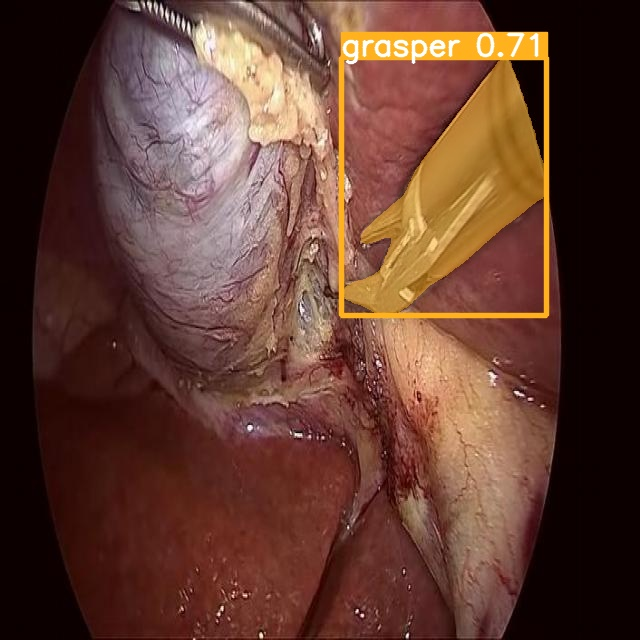

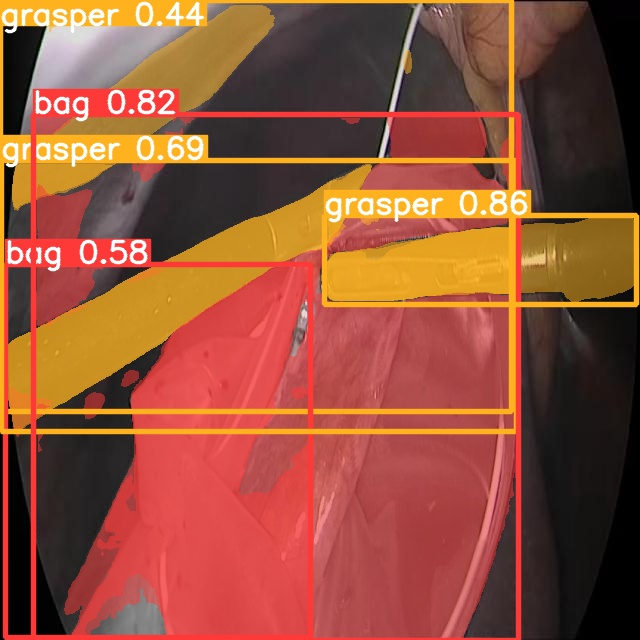

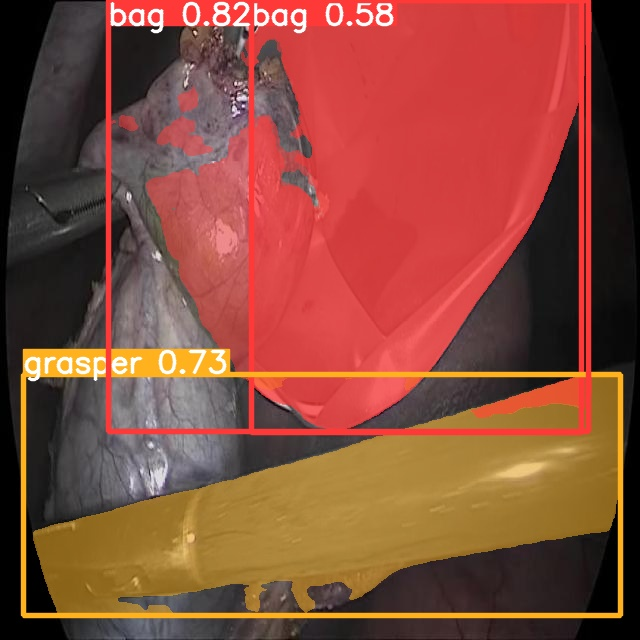

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [21]:
!zip -r /content/runs.zip /content/runs


  adding: content/runs/ (stored 0%)
  adding: content/runs/segment/ (stored 0%)
  adding: content/runs/segment/train/ (stored 0%)
  adding: content/runs/segment/train/events.out.tfevents.1683957868.a5412902816d.1253.0 (deflated 72%)
  adding: content/runs/segment/train/results.png (deflated 8%)
  adding: content/runs/segment/train/args.yaml (deflated 51%)
  adding: content/runs/segment/train/train_batch2.jpg (deflated 3%)
  adding: content/runs/segment/train/results.csv (deflated 85%)
  adding: content/runs/segment/train/weights/ (stored 0%)
  adding: content/runs/segment/train/weights/best.pt (deflated 8%)
  adding: content/runs/segment/train/weights/last.pt (deflated 8%)
  adding: content/runs/segment/train/train_batch1.jpg (deflated 3%)
  adding: content/runs/segment/train/train_batch0.jpg (deflated 7%)
  adding: content/runs/segment/predict/ (stored 0%)
  adding: content/runs/segment/predict/v08_012900_jpg.rf.24d11e4aa146cdd25a48b2274d579104.jpg (deflated 4%)
  adding: content/runs